In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats



In [2]:
#loading the Excel files
houseprice = "Input_Files/Median Sales Price of Houses Sold for the United States.xls"
rentocc = "Input_Files/Housing Inventory Estimate Renter Occupied Housing Units in the United States.xls"
rentindex = "Input_Files/CPI_RENT_INDEX.xls"
#reading in the Excel files
houseprices = pd.read_excel(houseprice)
rentoccs = pd.read_excel(rentocc)
rentindec = pd.read_excel(rentindex)

In [3]:
#Combining datasets
rentandhouse = rentoccs.merge(houseprices, on='observation_date', how='left')

In [4]:
#one more combine
rentsandhouse = rentandhouse.merge(rentindec, on='observation_date', how='left')

In [5]:
#Rename the columns
rentsandhouse.rename(columns = {'ERNTOCCUSQ176N' : 'rental_occupancy', 'MSPUS' : 'median_house_sale', 'CUUR0000SEHA_NBD20000401' : 'qrt_rent_ind'} , inplace = True)

In [6]:
#Make a CSV
rentsandhouse.info()
rentsandhouse.to_csv("Input_Files/LPhouseandrent.csv", index_label="")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 92
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   observation_date   93 non-null     datetime64[ns]
 1   rental_occupancy   93 non-null     int64         
 2   median_house_sale  93 non-null     int64         
 3   qrt_rent_ind       93 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.6 KB


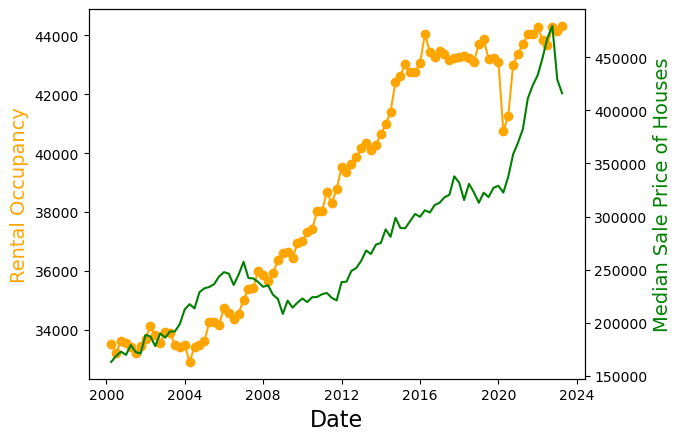

<Figure size 640x480 with 0 Axes>

In [7]:
#First Chart
fig,ax = plt.subplots()
ax.plot(rentsandhouse["observation_date"], rentsandhouse["rental_occupancy"], color="orange", marker="o")
ax.set_xlabel("Date", fontsize = 16)
ax.set_ylabel("Rental Occupancy", color="orange", fontsize = 14)
ax2 = ax.twinx()
ax2.plot(rentsandhouse["observation_date"], rentsandhouse["median_house_sale"], color="green")
ax2.set_ylabel("Median Sale Price of Houses", color="green", fontsize = 14)
#plt.plot(rentsandhouse["observation_date"], oh_fit, "--")
plt.show()
plt.savefig("images/RentoccVshouse.png")

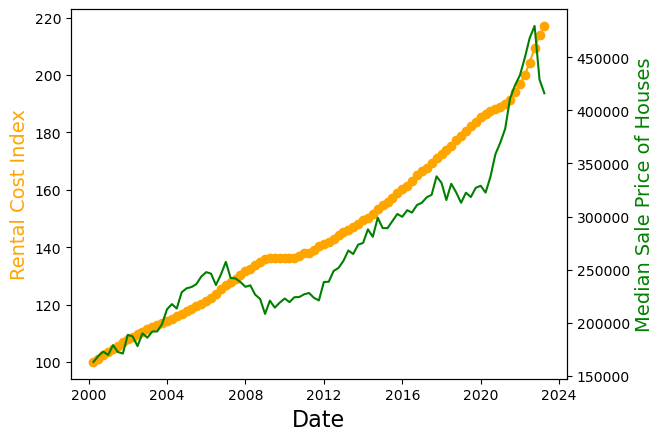

<Figure size 640x480 with 0 Axes>

In [10]:
#second chart
fig,ax = plt.subplots()
ax.plot(rentsandhouse["observation_date"], rentsandhouse["qrt_rent_ind"], color="orange", marker="o")
ax.set_xlabel("Date", fontsize = 16)
ax.set_ylabel("Rental Cost Index", color="orange", fontsize = 14)
ax2 = ax.twinx()
ax2.plot(rentsandhouse["observation_date"], rentsandhouse["median_house_sale"], color="green")
ax2.set_ylabel("Median Sale Price of Houses", color="green", fontsize = 14)
plt.show()
plt.savefig("images/RentIndVshouse.png")

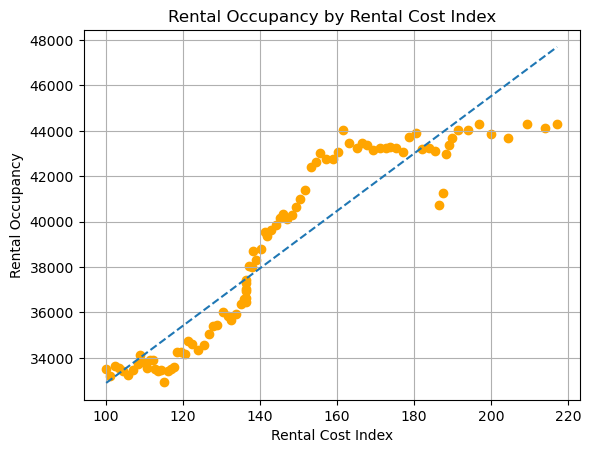

In [9]:
#third chart (maybe)
rentalocc = rentsandhouse["rental_occupancy"]
rentindx = rentsandhouse["qrt_rent_ind"] 

re_slope, re_int, re_r, re_p, re_std_err = stats.linregress(rentindx, rentalocc)

re_fit = re_slope * rentindx + re_int

plt.scatter(rentsandhouse["qrt_rent_ind"], rentsandhouse["rental_occupancy"], marker="o", color="orange")
plt.plot(rentindx, re_fit, "--")
# Incorporate the other graph properties
plt.title("Rental Occupancy by Rental Cost Index")
plt.ylabel("Rental Occupancy")
plt.xlabel("Rental Cost Index")
plt.grid(True)

# Save the figure
plt.savefig("images/rentoccVsRentindx.png")

# Show plot
plt.show()